In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv("ElectricCarData_Norm.csv")

In [3]:
df.head()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6 sec,233 km/h,450 km,161 Wh/km,940 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0 sec,160 km/h,270 km,167 Wh/km,250 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7 sec,210 km/h,400 km,181 Wh/km,620 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8 sec,180 km/h,360 km,206 Wh/km,560 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5 sec,145 km/h,170 km,168 Wh/km,190 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,32997


In [4]:
df.tail()

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
98,Nissan,Ariya 63kWh,7.5 sec,160 km/h,330 km,191 Wh/km,440 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5 sec,210 km/h,335 km,258 Wh/km,540 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9 sec,200 km/h,325 km,194 Wh/km,440 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1 sec,200 km/h,375 km,232 Wh/km,450 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,Hatchback,C,5,65000
102,Byton,M-Byte 95 kWh 2WD,7.5 sec,190 km/h,400 km,238 Wh/km,480 km/h,Rapid charging possible,All Wheel Drive,Type 2 CCS,SUV,E,5,62000


In [5]:
df.sample(5)

,Brand,Model,Accel,TopSpeed,Range,Efficiency,FastCharge,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
70,BMW,i3s 120 Ah,6.9 sec,160 km/h,230 km,165 Wh/km,260 km/h,Rapid charging possible,Rear Wheel Drive,Type 2 CCS,Hatchback,B,4,41526
17,Volkswagen,e-Up!,11.9 sec,130 km/h,195 km,166 Wh/km,170 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,Hatchback,A,4,21421
49,Aiways,U5,9.0 sec,150 km/h,335 km,188 Wh/km,350 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,SUV,C,5,36057
31,Kia,e-Niro 64 kWh,7.8 sec,167 km/h,370 km,173 Wh/km,350 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,SUV,C,5,38105
41,Hyundai,Kona Electric 39 kWh,9.9 sec,155 km/h,255 km,154 Wh/km,210 km/h,Rapid charging possible,Front Wheel Drive,Type 2 CCS,SUV,B,5,33971


In [6]:
df.shape

(103, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Brand        103 non-null    object
 1   Model        103 non-null    object
 2   Accel        103 non-null    object
 3   TopSpeed     103 non-null    object
 4   Range        103 non-null    object
 5   Efficiency   103 non-null    object
 6   FastCharge   103 non-null    object
 7   RapidCharge  103 non-null    object
 8   PowerTrain   103 non-null    object
 9   PlugType     103 non-null    object
 10  BodyStyle    103 non-null    object
 11  Segment      103 non-null    object
 12  Seats        103 non-null    int64 
 13  PriceEuro    103 non-null    int64 
dtypes: int64(2), object(12)
memory usage: 11.4+ KB


In [8]:
df.isnull().sum()

Brand          0
Model          0
Accel          0
TopSpeed       0
Range          0
Efficiency     0
FastCharge     0
RapidCharge    0
PowerTrain     0
PlugType       0
BodyStyle      0
Segment        0
Seats          0
PriceEuro      0
dtype: int64

In [9]:
df.corr()

,Seats,PriceEuro
Seats,1.00000,0.02092
PriceEuro,0.02092,1.00000


In [10]:
df.describe()

,Seats,PriceEuro
count,103.000000,103.000000
mean,4.883495,55811.563107
std,0.795834,34134.665280
min,2.000000,20129.000000
25%,5.000000,34429.500000
50%,5.000000,45000.000000
75%,5.000000,65000.000000
max,7.000000,215000.000000


In [11]:
df.columns.tolist()

['Brand',
 'Model',
 'Accel',
 'TopSpeed',
 'Range',
 'Efficiency',
 'FastCharge',
 'RapidCharge',
 'PowerTrain',
 'PlugType',
 'BodyStyle',
 'Segment',
 'Seats',
 'PriceEuro']

In [12]:
df[['FastCharge','TopSpeed']] = df[['FastCharge','TopSpeed']].replace(to_replace=r'([a-z/]+|[A-Z/]+)', value='', regex=True)

In [13]:
df['FastCharge'].unique()

array(['940 ', '250 ', '620 ', '560 ', '190 ', '220 ', '420 ', '650 ',
       '540 ', '440 ', '230 ', '380 ', '210 ', '590 ', '780 ', '170 ',
       '260 ', '930 ', '850 ', '910 ', '490 ', '470 ', '270 ', '450 ',
       '350 ', '710 ', '240 ', '390 ', '570 ', '610 ', '340 ', '730 ',
       '920 ', '-', '550 ', '900 ', '520 ', '430 ', '890 ', '410 ',
       '770 ', '460 ', '360 ', '810 ', '480 ', '290 ', '330 ', '740 ',
       '510 ', '320 ', '500 '], dtype=object)

In [14]:
df['FastCharge']=df['FastCharge'].str.replace('-','0')

In [21]:
df['FastCharge'].unique()

array(['940 ', '250 ', '620 ', '560 ', '190 ', '220 ', '420 ', '650 ',
       '540 ', '440 ', '230 ', '380 ', '210 ', '590 ', '780 ', '170 ',
       '260 ', '930 ', '850 ', '910 ', '490 ', '470 ', '270 ', '450 ',
       '350 ', '710 ', '240 ', '390 ', '570 ', '610 ', '340 ', '730 ',
       '920 ', '0', '550 ', '900 ', '520 ', '430 ', '890 ', '410 ',
       '770 ', '460 ', '360 ', '810 ', '480 ', '290 ', '330 ', '740 ',
       '510 ', '320 ', '500 '], dtype=object)

In [22]:
df['TopSpeed'].unique()

array(['233 ', '160 ', '210 ', '180 ', '145 ', '250 ', '150 ', '225 ',
       '144 ', '167 ', '200 ', '165 ', '260 ', '130 ', '140 ', '217 ',
       '240 ', '261 ', '190 ', '135 ', '157 ', '155 ', '410 ', '241 ',
       '123 '], dtype=object)

In [23]:
x=df[["PriceEuro", "FastCharge", "TopSpeed"]]

In [24]:
x

,PriceEuro,FastCharge,TopSpeed
0,55480,940,233
1,30000,250,160
2,56440,620,210
3,68040,560,180
4,32997,190,145
...,...,...,...
98,45000,440,160
99,96050,540,210
100,50000,440,200
101,65000,450,200


In [25]:
model=KMeans(n_clusters=4)   

In [26]:
model=model.fit(x)

C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [27]:
tahmin=model.predict(x)

In [28]:
x['cluster']=tahmin

C:\Users\Sarıkaya\AppData\Local\Temp\ipykernel_6968\1051485789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['cluster']=tahmin


In [29]:
x

,PriceEuro,FastCharge,TopSpeed,cluster
0,55480,940,233,0
1,30000,250,160,1
2,56440,620,210,0
3,68040,560,180,0
4,32997,190,145,1
...,...,...,...,...
98,45000,440,160,1
99,96050,540,210,3
100,50000,440,200,0
101,65000,450,200,0


In [30]:
silhouette_score(x,tahmin)

0.6317496405250349

In [31]:
clust=x.assign(Cluster=model.labels_)
model.cluster_centers_.astype('int')
model.labels_

array([0, 1, 0, 0, 1, 3, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 0,
       1, 3, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 3, 2, 1, 0, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 0, 0, 0, 3,
       1, 0, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 3, 1, 1, 0, 1, 1, 0,
       1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 3, 0, 0, 0])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


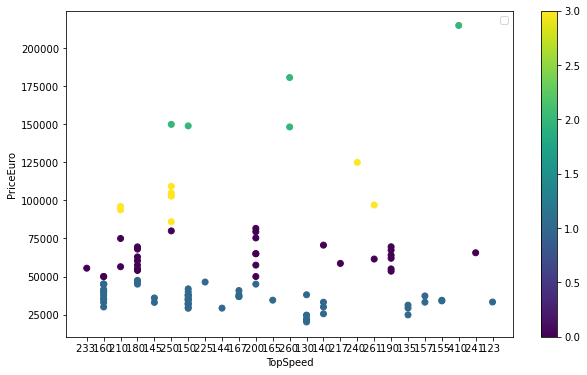

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(x.TopSpeed,x.PriceEuro,c=tahmin)         
plt.xlabel("TopSpeed")
plt.ylabel("PriceEuro")
plt.legend()
plt.colorbar()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


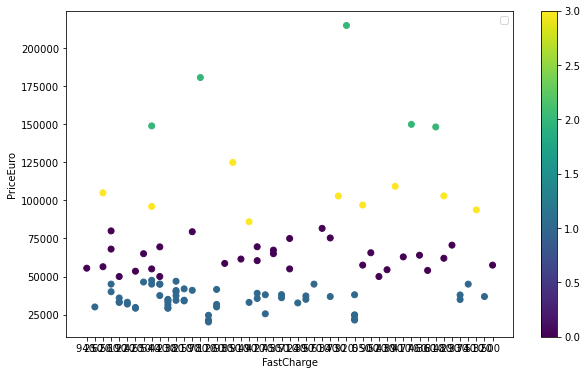

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(x.FastCharge,x.PriceEuro,c=tahmin)         
plt.xlabel("FastCharge")
plt.ylabel("PriceEuro")
plt.legend()
plt.colorbar()
plt.show()

In [34]:
allscore=[]
allclusters=[]
sum_of_squared_distances=[]
def clust (clusters):
    for no_of_cluster in np.arange(1,clusters):
        no_of_cluster+=1
        model=KMeans(n_clusters = no_of_cluster)
        model=model.fit(x)
        pred=model.fit_predict(x)
        sum_of_squared_distances.append(model.inertia_)
        score = silhouette_score(x,pred)
        print("Number of cluster {},silhouette{}".format(no_of_cluster,score))
        allscore.append(score)
        allclusters.append(no_of_cluster)
clust(9)

C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 2,silhouette0.7270240936975706


C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 3,silhouette0.6237534362307399


C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 4,silhouette0.6221154747073687


C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 5,silhouette0.5926062254711034


C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 6,silhouette0.5791907894215189


C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 7,silhouette0.496758371487881


C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 8,silhouette0.5083224255968967


C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Sarıkaya\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Number of cluster 9,silhouette0.5540085418507977


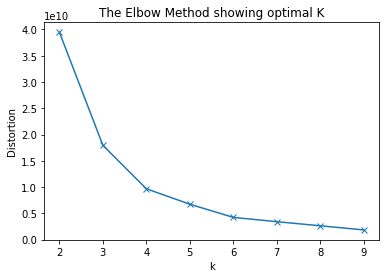

In [35]:
plt.plot(allclusters,sum_of_squared_distances,marker='x')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal K')
plt.show()

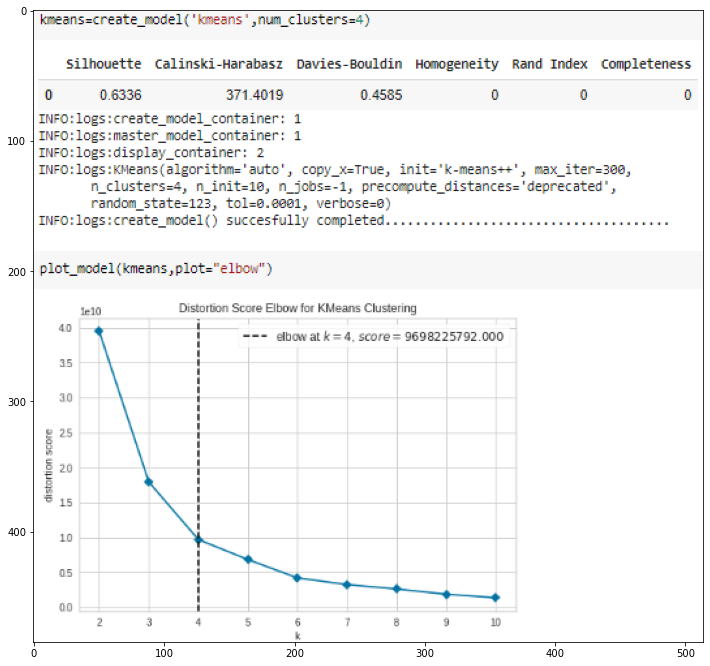

In [37]:
plt.figure(figsize=(12,12))
img=plt.imread('pycaret.PNG')
plt.imshow(img)
plt.show();